In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

Using TensorFlow backend.


In [2]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [3]:
train_dir = '/Users/Josh/DeepLearningData/fourAnimalClasses/train'
validation_dir = '/Users/Josh/DeepLearningData/fourAnimalClasses/validation'

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=40,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')

Found 8000 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.


In [5]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
validation_generator.class_indices

data batch shape: (40, 150, 150, 3)
labels batch shape: (40, 4)


{'bears': 0, 'deer': 1, 'lynx': 2, 'wolves': 3}

In [6]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=150,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=75)

Epoch 1/100
150/150 [==============================] - 177s 1s/step - loss: 1.3322 - acc: 0.3495 - val_loss: 1.1904 - val_acc: 0.4713
Epoch 2/100
150/150 [==============================] - 169s 1s/step - loss: 1.2258 - acc: 0.4377 - val_loss: 1.2270 - val_acc: 0.4407
Epoch 3/100
150/150 [==============================] - 169s 1s/step - loss: 1.1761 - acc: 0.4678 - val_loss: 1.0845 - val_acc: 0.5270
Epoch 4/100
150/150 [==============================] - 168s 1s/step - loss: 1.1284 - acc: 0.4980 - val_loss: 1.0761 - val_acc: 0.5617
Epoch 5/100
150/150 [==============================] - 167s 1s/step - loss: 1.0807 - acc: 0.5342 - val_loss: 1.0714 - val_acc: 0.5353
Epoch 6/100
150/150 [==============================] - 167s 1s/step - loss: 1.0166 - acc: 0.5742 - val_loss: 1.0605 - val_acc: 0.5797
Epoch 7/100
150/150 [==============================] - 168s 1s/step - loss: 0.9997 - acc: 0.5752 - val_loss: 0.9881 - val_acc: 0.5857
Epoch 8/100
150/150 [==============================] - 169s 1s

Epoch 62/100
150/150 [==============================] - 170s 1s/step - loss: 0.3375 - acc: 0.8807 - val_loss: 0.3608 - val_acc: 0.8813
Epoch 63/100
150/150 [==============================] - 168s 1s/step - loss: 0.3355 - acc: 0.8812 - val_loss: 0.3489 - val_acc: 0.8803
Epoch 64/100
150/150 [==============================] - 171s 1s/step - loss: 0.3180 - acc: 0.8847 - val_loss: 0.3656 - val_acc: 0.8813
Epoch 65/100
150/150 [==============================] - 168s 1s/step - loss: 0.3247 - acc: 0.8840 - val_loss: 0.7156 - val_acc: 0.8060
Epoch 66/100
150/150 [==============================] - 174s 1s/step - loss: 0.3201 - acc: 0.8868 - val_loss: 0.4093 - val_acc: 0.8687
Epoch 67/100
150/150 [==============================] - 177s 1s/step - loss: 0.3101 - acc: 0.8862 - val_loss: 0.3428 - val_acc: 0.8877
Epoch 68/100
150/150 [==============================] - 171s 1s/step - loss: 0.3243 - acc: 0.8880 - val_loss: 0.4101 - val_acc: 0.8680
Epoch 69/100
150/150 [==============================] -

In [7]:
model.save('ForestAnimals5.h5')

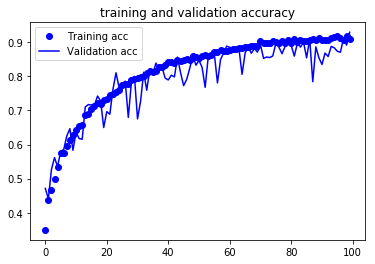

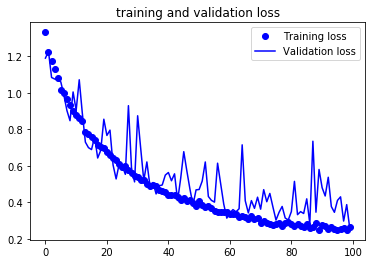

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()